In [164]:
from fast_to_SQL.fast_to_SQL import to_sql_fast
import pandas as pd
from urllib.parse import quote_plus
import sqlalchemy

params = quote_plus(
    """DRIVER={ODBC Driver 13 for SQL Server};
    SERVER=server-dw01.database.windows.net;
    DATABASE=DataWarehouseStaging;
    UID=dw_userlogin;
    PWD=kljDueK!7"""
)

ENGINE = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

In [165]:
df = pd.read_sql('''SELECT *

FROM pam.dataset

                ''', ENGINE)

In [166]:
df = df[['com_id_h', '2018-05-01', '2018-06-01', '2018-07-01',
       '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
       '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
       '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01']]

In [167]:
month_name_dict = {'jan': '01',
'feb':'02',
'mar':'03',
'apr':'04',
'may':'05',
'jun':'06',
'jul':'07',
'aug':'08',
'sep':'09',
'oct':'10',
'nov':'11',
'dec':'12'
}

In [168]:
month_dict = {}
for k, v in month_name_dict.items():
    month_dict[k] = [i for i in list(df.columns) if i[5:7] == v]

In [170]:
sum_df = pd.DataFrame(df['com_id_h'])
for key in month_dict:
    sum_df[key] = df[month_dict[key]].mean(axis = 1)

In [171]:
sum_df

,com_id_h,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0C1C5D9BC8247B3E2CE4851AB1FA7DAC016491ED000000...,20867.9,19705.00,19967.80,NaN,27267.70,21112.55,21018.55,18350.800,16931.41,22868.67,23433.20,13799.60
1,0C1C7B3A64557BF87E80B39EACDD42BF053F9DA0000000...,3965.0,2640.00,2905.00,2450.0,2962.50,2667.50,2335.50,2142.500,3260.00,3025.00,2295.00,1490.00
2,0C1CA9A1623B9E54FB901BB606115AA01C00F6CF000000...,NaN,NaN,NaN,NaN,1217.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0C1CC398CF4ACB7442943E83E1BD180B80DBC172000000...,NaN,NaN,NaN,NaN,1151.00,947.20,721.40,NaN,NaN,NaN,NaN,NaN
4,0C1DE32ED621EA9C99F8A75425C58846C8F731B0000000...,44234.0,46928.68,46806.70,NaN,47082.12,51644.35,43827.32,46147.310,44894.08,44049.57,41180.90,47397.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368731,FFFE60639DC3544D17C0E32C095C5A19EC42D353000000...,NaN,NaN,NaN,NaN,32867.12,32313.28,34135.08,17594.930,NaN,NaN,NaN,NaN
368732,FFFEDD7977264D9B9C36DFF37ECF44D73691D017000000...,NaN,231.41,384.35,NaN,487.49,484.13,378.73,492.870,594.58,525.72,362.93,842.24
368733,FFFEDEDCA71B070DFB94C7C69AA3766765B61A6C000000...,NaN,1000.00,NaN,1280.0,3390.00,100.00,1640.00,1340.000,827.50,1305.00,NaN,700.00
368734,FFFF1FC7A0F5A9E5AAC5621314C1917711A4FD48000000...,41406.7,43044.08,50882.30,NaN,60085.73,47311.30,57938.02,62207.885,50435.62,51505.68,46877.51,113181.95


In [172]:
Xer_df = pd.DataFrame(sum_df['com_id_h'])
for key in month_dict:
    month_list = list(sum_df.columns)
    month_list = [i for i in month_list if i not in ['com_id_h', key]]
    Xer_df[key] = sum_df[key] / sum_df[month_list].mean(axis=1)

In [175]:
Xer_df

,com_id_h,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0C1C5D9BC8247B3E2CE4851AB1FA7DAC016491ED000000...,1.020658,0.958330,0.972353,NaN,1.376771,1.033861,1.028785,0.886630,0.812480,1.129571,1.160692,0.652391
1,0C1C7B3A64557BF87E80B39EACDD42BF053F9DA0000000...,1.548113,0.984474,1.093114,0.907774,1.116947,0.995657,0.862025,0.785701,1.241776,1.142960,0.845927,0.534782
2,0C1CA9A1623B9E54FB901BB606115AA01C00F6CF000000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0C1CC398CF4ACB7442943E83E1BD180B80DBC172000000...,NaN,NaN,NaN,NaN,1.379600,1.011750,0.687637,NaN,NaN,NaN,NaN,NaN
4,0C1DE32ED621EA9C99F8A75425C58846C8F731B0000000...,0.961695,1.026293,1.023352,NaN,1.029994,1.141190,0.952012,1.007484,0.977449,0.957302,0.889414,1.037612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368731,FFFE60639DC3544D17C0E32C095C5A19EC42D353000000...,NaN,NaN,NaN,NaN,1.173221,1.145900,1.237147,0.531486,NaN,NaN,NaN,NaN
368732,FFFEDD7977264D9B9C36DFF37ECF44D73691D017000000...,NaN,0.457428,0.786153,NaN,1.021050,1.013220,0.773669,1.033612,1.277180,1.111007,0.738744,1.922820
368733,FFFEDEDCA71B070DFB94C7C69AA3766765B61A6C000000...,NaN,0.755965,NaN,0.993934,3.310345,0.069671,1.319588,1.046619,0.615528,1.015811,NaN,0.514588
368734,FFFF1FC7A0F5A9E5AAC5621314C1917711A4FD48000000...,0.709663,0.739802,0.886460,NaN,1.063858,0.819150,1.021945,1.105586,0.877995,0.898296,0.811031,2.211903


In [179]:
import numpy as np
Xer_df = Xer_df.replace([np.inf, -np.inf], np.nan)

In [180]:
to_sql_fast(Xer_df, name = 'pam.dataset_Xer', engine = ENGINE, if_exists = 'replace')

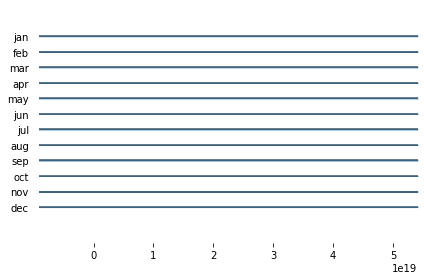

In [183]:
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
fig, axes = joypy.joyplot(Xer_df, alpha = 0.5)

In [185]:
col_list = list(Xer_df.columns)
col_list = [i for i in col_list if i != 'com_id_h']   

In [186]:
unpivot_df = pd.melt(Xer_df, id_vars = ['com_id_h'], value_vars = col_list, var_name = 'month', value_name = 'Xer')

In [187]:
decile_df = pd.DataFrame()
for month in col_list:
    loop_df = unpivot_df[unpivot_df['month'] == month]
    loop_df['decile'] = pd.qcut(loop_df['Xer'], 10, labels = False)
    decile_df = decile_df.append(loop_df)

c:\users\ryan.skeels\appdata\local\continuum\anaconda2\envs\py36_pam\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [195]:
group_df = pd.DataFrame(decile_df.groupby(['month', 'decile'])['Xer'].median().reset_index())

In [196]:
group_df

,month,decile,Xer
0,apr,0.0,0.341505
1,apr,1.0,0.630464
2,apr,2.0,0.777567
3,apr,3.0,0.873615
4,apr,4.0,0.942756
...,...,...,...
115,sep,5.0,0.990223
116,sep,6.0,1.052088
117,sep,7.0,1.137796
118,sep,8.0,1.293065


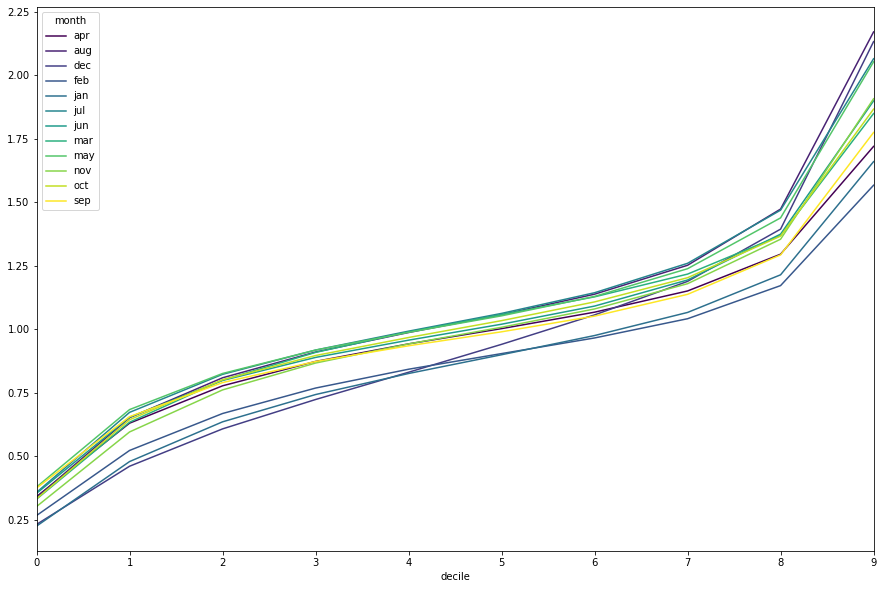

In [197]:
group_df.pivot(index = 'decile', columns = 'month', values = 'Xer').plot(figsize = (15,10), colormap = 'viridis')